# Synthesize 2D Field


This demo performs a **2D synthesis** using the `foscat.scattering_cov_2D` module,  
which is strongly inspired by the package [scattering_transform](https://github.com/SihaoCheng/scattering_transform)  
developed by **Sihao Cheng** and **Rudy Morel**.

FOSCAT introduces some specific features:

- **Multiscale synthesis**: the algorithm first reconstructs large-scale structures,  
  which makes the final synthesis at full resolution more stable and efficient.
- **Gaussianization**: the input data is transformed to have a distribution closer to Gaussian,  
  improving the statistical description of scattering information and making the method more robust,  
  especially in the presence of strong intermittency, as in this example.

## Initialize library

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import foscat.scat_cov2D as sc

## Get Data

Fichier téléchargé : cloud_fields.npy


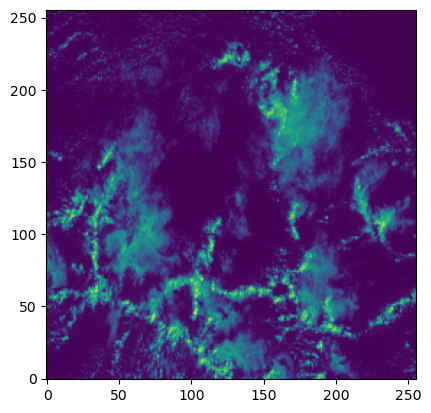

In [2]:
import requests

url = "https://github.com/jmdelouis/FOSCAT/raw/main/src/tests/cloud_fields.npy"  # Lien brut
filename = "cloud_fields.npy"  # Nom du fichier local

# Télécharger le fichier
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Fichier téléchargé : {filename}")
else:
    print(f"Échec du téléchargement, code HTTP : {response.status_code}")

image_target=np.load('cloud_fields.npy')[1]
plt.imshow(image_target,origin='lower')

## Do the foscat library synthesis

## Do synthesis WITHOUT gaussian regularisation of the input data

In [3]:
import foscat.scat_cov2D as sc

# Initialize the scattering covariance library
scat_op=sc.funct(NORIENT=6)

result=scat_op.to_numpy(scat_op.synthesis(image_target,seed=9,NUM_EPOCHS=300,nstep=3))

Synthesis scale [ 64 x 64 ]
Total number of loss  1
Itt      0 L=    0.0204 (    0.0204 ) 0.115s 
Itt    100 L=  4.64e-05 (  4.64e-05 ) 3.756s 
Itt    200 L=  1.66e-05 (  1.66e-05 ) 3.721s 
Itt    300 L=   5.3e-06 (   5.3e-06 ) 3.800s 
Final Loss  5.3017615755379666e-06
Synthesis scale [ 128 x 128 ]
Total number of loss  1
Itt      0 L=   0.00178 (   0.00178 ) 0.049s 
Itt    100 L=  1.83e-06 (  1.83e-06 ) 5.285s 
Itt    200 L=  7.57e-07 (  7.57e-07 ) 5.231s 
Itt    300 L=  4.08e-07 (  4.08e-07 ) 5.251s 
Final Loss  4.0776592413749313e-07
Synthesis scale [ 256 x 256 ]
Total number of loss  1
Itt      0 L=   0.00125 (   0.00125 ) 0.080s 
Itt    100 L=   3.2e-07 (   3.2e-07 ) 7.927s 
Itt    200 L=   2.1e-07 (   2.1e-07 ) 7.987s 
Itt    300 L=  1.53e-07 (  1.53e-07 ) 7.765s 
Final Loss  1.530496120949465e-07
Total computation 52.15s


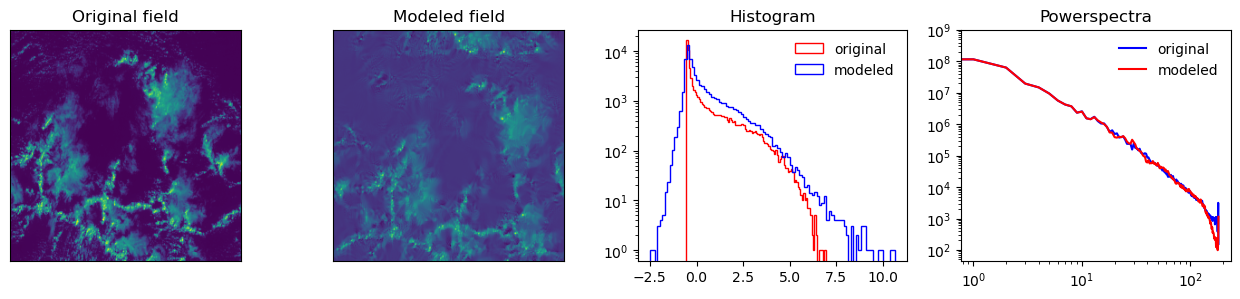

In [4]:
scat_op.plot_results(image_target,result,cmap='viridis')

## Do synthesis WITH gaussian regularisation of the input data

In [5]:
result=scat_op.to_numpy(scat_op.synthesis(image_target,seed=9,NUM_EPOCHS=300,nstep=3,to_gaussian=True))

Synthesis scale [ 64 x 64 ]
Total number of loss  1
Itt      0 L=    0.0278 (    0.0278 ) 0.031s 
Itt    100 L=  4.53e-05 (  4.53e-05 ) 3.627s 
Itt    200 L=  1.39e-05 (  1.39e-05 ) 3.822s 
Itt    300 L=  5.19e-06 (  5.19e-06 ) 3.424s 
Final Loss  5.194274308450986e-06
Synthesis scale [ 128 x 128 ]
Total number of loss  1
Itt      0 L=   0.00131 (   0.00131 ) 0.049s 
Itt    100 L=  3.76e-06 (  3.76e-06 ) 5.605s 
Itt    200 L=  2.06e-06 (  2.06e-06 ) 5.157s 
Itt    300 L=  1.33e-06 (  1.33e-06 ) 5.234s 
Final Loss  1.3322219274414238e-06
Synthesis scale [ 256 x 256 ]
Total number of loss  1
Itt      0 L=   0.00116 (   0.00116 ) 0.070s 
Itt    100 L=  1.09e-06 (  1.09e-06 ) 7.993s 
Itt    200 L=   7.9e-07 (   7.9e-07 ) 7.820s 
Itt    300 L=  5.92e-07 (  5.92e-07 ) 8.029s 
Final Loss  5.920267653891642e-07
Total computation 50.95s


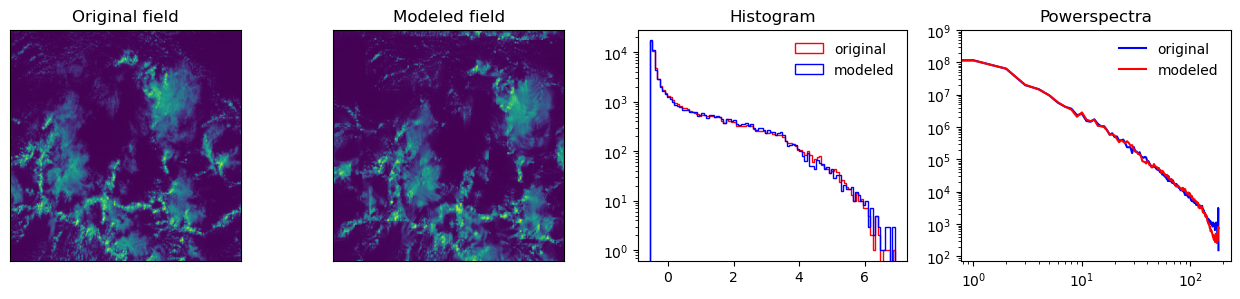

In [6]:
scat_op.plot_results(image_target,result,cmap='viridis')